In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
executable_path = {'executable_path': 'templates/chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

# Tesla Make & Model & Price & Image from Carvana

In [10]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find('div', class_='year-make').text
tesla_model = soup.find('div', class_='model').text
tesla_price = soup.find('div', class_='price').text
tesla_image = soup.find('img')['src']

print(tesla_make)
print(tesla_model)
print(tesla_price)
print(tesla_image)

2021 Tesla
Model 3
$55,990
//cdnblob.fastly.carvana.io/2001235254/post-large/normalized/zoomcrop/2001235254-edc-02.jpg?v=2021.8.31_15.13.1&width=347


# Tesla Image

In [17]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find_all('div', class_='year-make')
tesla_model = soup.find_all('div', class_='model')
tesla_price = soup.find_all('div', class_='price')
tesla_image = soup.find_all('img')

[<div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2017<!-- --> <!-- -->Tesla</div>, <div class="year-make">2020<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2015<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2020<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2021<!-- --> <!-- -->Tesla</div>, <div class="year-make">2020<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2020<!-
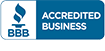

In [16]:
print(tesla_make)
print(tesla_model)
print(tesla_price)
print(tesla_image)

['2020 Tesla', '2017 Tesla', '2019 Tesla', '2018 Tesla', '2020 Tesla', '2019 Tesla', '2018 Tesla', '2018 Tesla', '2019 Tesla', '2015 Tesla', '2019 Tesla', '2019 Tesla', '2021 Tesla', '2020 Tesla', '2018 Tesla', '2019 Tesla', '2019 Tesla', '2020 Tesla', '2020 Tesla']
['Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model Y', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model S', 'Model 3', 'Model 3', 'Model Y', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model Y', 'Model 3']
['$56,990', '$43,590', '$50,590', '$45,590', '$65,590', '$50,590', '$44,749', '$43,990', '$43,990', '$47,590', '$43,990', '$43,990', '$64,990', '$51,590', '$43,990', '$50,500', '$45,990', '$61,590', '$43,990']
['//cdnblob.fastly.carvana.io/2001247587/post-large/normalized/zoomcrop/2001247587-edc-02.jpg?v=2021.9.2_21.38.52&width=347', '//cdnblob.fastly.carvana.io/2000993101/post-large/2000993101-edc-02-search.jpg?v=2021.6.10_20.41.49', '//cdnblob.fastly.carvana.io/2001146189/post-large/normalized/zoomcrop/2001146189-ed
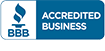

In [18]:
tesla_make_text = [ div.text for div in tesla_make ]
print(tesla_make_text)

tesla_model_text = [ div.text for div in tesla_model ]
print(tesla_model_text)

tesla_price_text = [ div.text for div in tesla_price ]
print(tesla_price_text)

tesla_image_source = [ img[ "src"] for img in tesla_image ]
print(tesla_image_source)

# For loop and find all Teslas

In [15]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find_all('div', class_='year-make')
tesla_model = soup.find_all('div', class_='model')
tesla_price = soup.find_all('div', class_='price')
tesla_image = soup.find_all('img')

# browser.click_link_by_text('Next')

teslas = []

for i in range (0, len(tesla_make)):
    tesla = {}
    tesla['make']= tesla_make[i].text
    tesla['model']= tesla_model[i].text
    tesla['price']= tesla_price[i].text
    tesla['image']= tesla_image[i]['src']
    teslas.append(teslas)
    print(tesla)

{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$50,590', 'image': '//cdnblob.fastly.carvana.io/2001146189/post-large/normalized/zoomcrop/2001146189-edc-02.jpg?v=2021.8.16_16.48.28&width=347'}
{'make': '2017 Tesla', 'model': 'Model 3', 'price': '$43,590', 'image': '//cdnblob.fastly.carvana.io/2000993101/post-large/2000993101-edc-02-search.jpg?v=2021.6.10_20.41.49'}
{'make': '2020 Tesla', 'model': 'Model Y', 'price': '$65,590', 'image': '//cdnblob.fastly.carvana.io/2001217453/post-large/normalized/zoomcrop/2001217453-edc-02.jpg?v=2021.8.13_15.11.53&width=347'}
{'make': '2018 Tesla', 'model': 'Model 3', 'price': '$45,590', 'image': '//cdnblob.fastly.carvana.io/2001190503/post-large/2001190503-edc-02-search.jpg?v=2021.8.24_16.46.41'}
{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$50,590', 'image': '//cdnblob.fastly.carvana.io/2001135953/post-large/2001135953-edc-02-search.jpg?v=2021.7.23_22.59.39'}
{'make': '2018 Tesla', 'model': 'Model 3', 'price': '$43,990', 'image': '//cdnb

In [9]:
browser.quit()